In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/DATA - Sheet1.csv')

In [ ]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,Gold_Price_gram,Silver_Price_gram,USD_rate,Crude_oil,Fuel_Price
0,1/1/2016,4913.36,64.271,144.48,3903.82,117
1,1/4/2016,4935.38,64.694,144.69,3909.62,117
2,1/5/2016,4989.30,64.905,144.35,3900.33,117
3,1/6/2016,4990.05,64.697,143.98,3890.23,117
4,1/7/2016,5090.48,65.866,143.51,3877.76,117


In [ ]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,Gold_Price_gram,Silver_Price_gram,USD_rate,Crude_oil,Fuel_Price
1620,9/26/2022,19150.40,213.75,362.08,32387.77,450
1621,9/27/2022,19018.19,215.31,363.76,32538.44,450
1622,9/28/2022,18951.18,221.70,364.78,32629.82,450
1623,9/29/2022,19307.73,217.70,359.78,32182.54,450
1624,9/30/2022,19379.72,223.74,366.40,32774.39,450


In [ ]:
# number of rows and columns
gold_data.shape

(1625, 6)

In [ ]:
# getting some basic informations about the data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1625 non-null   object 
 1   Gold_Price_gram    1625 non-null   float64
 2   Silver_Price_gram  1625 non-null   float64
 3   USD_rate           1625 non-null   float64
 4   Crude_oil          1625 non-null   float64
 5   Fuel_Price         1625 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 76.3+ KB


In [ ]:
# checking the number of missing values
gold_data.isnull().sum()

Date                 0
Gold_Price_gram      0
Silver_Price_gram    0
USD_rate             0
Crude_oil            0
Fuel_Price           0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,Gold_Price_gram,Silver_Price_gram,USD_rate,Crude_oil,Fuel_Price
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,9240.666375,116.300788,186.352800,11294.151255,154.720615
std,3989.087532,47.930063,52.729965,8049.449732,77.634514
min,4913.360000,63.682000,142.850000,2877.260000,117.000000
25%,6269.500000,82.911000,153.220000,6891.240000,117.000000
50%,7589.890000,91.343000,178.600000,9501.130000,137.000000
75%,11334.140000,150.120000,193.510000,11071.140000,140.000000
max,21999.430000,270.590000,369.030000,41187.020000,470.000000


Correlation:

Positive Correlation
Negative Correlation

In [ ]:
correlation = gold_data.corr()

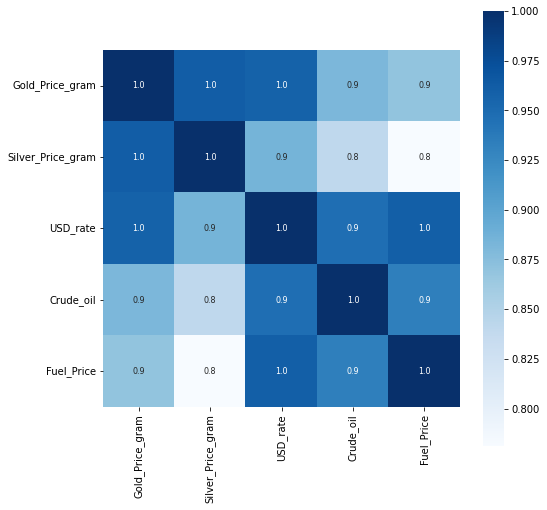

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['Gold_Price_gram'])

Gold_Price_gram      1.000000
Silver_Price_gram    0.962143
USD_rate             0.957512
Crude_oil            0.881519
Fuel_Price           0.869741
Name: Gold_Price_gram, dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


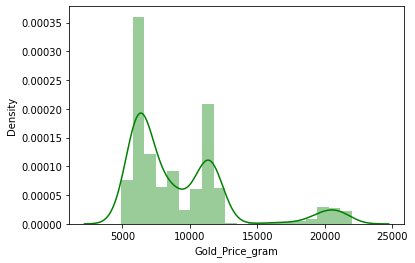

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['Gold_Price_gram'],color='green')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['Date','Gold_Price_gram','Fuel_Price'],axis=1)
Y = gold_data['Gold_Price_gram']

In [ ]:
print(X)

      Silver_Price_gram  USD_rate  Crude_oil
0                64.271    144.48    3903.82
1                64.694    144.69    3909.62
2                64.905    144.35    3900.33
3                64.697    143.98    3890.23
4                65.866    143.51    3877.76
...                 ...       ...        ...
1620            213.750    362.08   32387.77
1621            215.310    363.76   32538.44
1622            221.700    364.78   32629.82
1623            217.700    359.78   32182.54
1624            223.740    366.40   32774.39

[1625 rows x 3 columns]


In [ ]:
print(Y)

0        4913.36
1        4935.38
2        4989.30
3        4990.05
4        5090.48
          ...   
1620    19150.40
1621    19018.19
1622    18951.18
1623    19307.73
1624    19379.72
Name: Gold_Price_gram, Length: 1625, dtype: float64


Splitting into Training data and Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 8751.3651  8517.6861 11489.3426 11217.1483  6577.924   5993.7053
 21523.7878  6362.2184 11940.521  11294.0116  6247.9391  6237.1552
  5992.1919 11036.0278 16162.2599 10519.4344  8702.4601  7070.7748
 11350.0666 10582.7109  6388.5507  6132.6808  8742.1661 11668.2412
 11214.7162  6645.8712 10626.9048  6393.6509 18927.5221 11082.3709
  6246.6406  7724.2835  7357.7366  6691.2447 12141.8577 11597.6898
 20661.6066  8665.7028  6664.6162  8843.5482 11273.9703  6715.3855
  5851.1924 11422.865   8785.5655 11287.5886  6690.0457  5876.1927
  7848.1084  6573.7186  5875.5751 11717.7385  8042.3467  5616.294
  6262.248   8545.7868 11413.4352  5659.1806  6318.0214  7268.0529
  7723.0832  7916.291   6351.9205 11597.3369  5456.189  20531.9756
 10912.7901 21302.6322  8731.262   6801.7194  6666.2068  6083.4595
  5708.2687 18979.913   6234.2413 19893.8476 11607.1492 11021.6608
  7075.8995 10487.2831  9479.0004 11355.0427  5822.0754  7685.5404
  6708.5084  5988.8654  6339.3475  6266.6836  5447.7162  6665.0

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9980201467101382


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

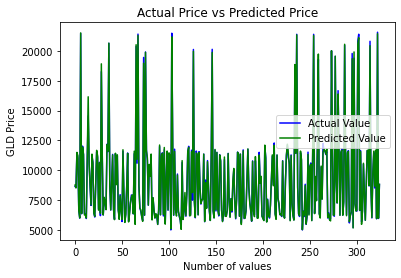

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(regressor, open('/content/RF_regressor.pkl', 'wb'))